# Capstone Project II: Predicting NBA All-Star Selection

Data: https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular

This dataset contains 2022-2023 regular season NBA player stats per game.

**Goal of the Project: To predict which basketball players will be chosen for the All-NBA Teams. These teams honor the best players in the league each season. In order to do this, we will need to figure out what factors make a player likely to be selected**

### Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

## 1. Data Inspection and Cleaning

In [2]:
#Importing data
df = pd.read_csv('2022-2023_NBA_Player_Stats_Regular.csv', delimiter = ';', encoding = 'ISO-8859-1', index_col=0)
df.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [3]:
# Adding Column "all_team_players", indicating if player is an All-Star
all_team_players = ['Giannis Antetokounmpo', 'LeBron James', 'Jayson Tatum', 'Donovan Mitchell', 'Kyrie Irving', 'Luka Don?i?',
                  'Nikola Joki?', 'Joel Embiid', 'Ja Morant', 'Lauri Markkanen', 'Bam Adebayo', 'Jaylen Brown', 'DeMar DeRozan',
                   'Tyrese Haliburton', 'Jrue Holiday', 'Julius Randle', 'Pascal Siakam', 'Anthony Edwards', "De'Aaron Fox", 'Paul George',
                   'Shai Gilgeous-Alexander', 'Jaren Jackson Jr.', 'Damian Lillard', 'Stephen Curry', 'Kevin Durant','Zion Williamson',
                   'Domantas Sabonis']

df['Made_All_Team'] = 0
df.loc[df['Player'].isin(all_team_players), 'Made_All_Team'] = 1
df[df['Made_All_Team'] == 1]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Made_All_Team
Rk,,,,,,,,,,,,,,,,,,,,,
3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,1
11,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,0.553,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,1
64,Jaylen Brown,SF,26,BOS,67,67,35.9,10.1,20.6,0.491,...,1.2,5.7,6.9,3.5,1.1,0.4,2.9,2.6,26.6,1
108,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1
117,DeMar DeRozan,SF,33,CHI,74,74,36.2,8.9,17.6,0.504,...,0.5,4.2,4.6,5.1,1.1,0.5,2.1,2.5,24.5,1
125,Luka Don?i?,PG,23,DAL,66,66,36.2,10.9,22.0,0.496,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,1
137,Kevin Durant,PF-SF,34,TOT,47,47,35.6,10.3,18.3,0.560,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1
137,Kevin Durant,PF,34,BRK,39,39,36.0,10.5,18.8,0.559,...,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,1
137,Kevin Durant,SF,34,PHO,8,8,33.6,9.1,16.0,0.570,...,0.4,6.0,6.4,3.5,0.3,1.3,2.5,0.9,26.0,1


In [4]:
# There are players with multiple row entrys (for each team they were on that season), this cell is combining 
# their stats
aggregations = {
    'PTS': 'mean',
    'AST': 'mean',
    'TRB': 'mean',
    'FG%': 'mean',
    '3P%': 'mean',
    'BLK': 'mean',
    'STL': 'mean',
    'MP': 'mean',
    'FT%': 'mean', 
    'Made_All_Team': 'mean'
}

df = df.groupby('Player').agg(aggregations).reset_index().round(1)
df.head()

,Player,PTS,AST,TRB,FG%,3P%,BLK,STL,MP,FT%,Made_All_Team
0,A.J. Green,4.4,0.6,1.3,0.4,0.4,0.0,0.2,9.9,1.0,0.0
1,A.J. Lawson,3.2,0.1,1.3,0.7,0.3,0.0,0.1,5.6,0.2,0.0
2,AJ Griffin,8.9,1.0,2.1,0.5,0.4,0.2,0.6,19.5,0.9,0.0
3,Aaron Gordon,16.3,3.0,6.6,0.6,0.3,0.8,0.8,30.2,0.6,0.0
4,Aaron Holiday,3.9,1.4,1.2,0.4,0.4,0.2,0.6,13.4,0.8,0.0


In [5]:
# Keeping most relevant columns
important_columns = ['Player', 'PTS', 'AST', 'TRB', 'FG%', '3P%', 'BLK', 'STL', 'MP', 'FT%', 'Made_All_Team']
df = df[important_columns]
df.head()

,Player,PTS,AST,TRB,FG%,3P%,BLK,STL,MP,FT%,Made_All_Team
0,A.J. Green,4.4,0.6,1.3,0.4,0.4,0.0,0.2,9.9,1.0,0.0
1,A.J. Lawson,3.2,0.1,1.3,0.7,0.3,0.0,0.1,5.6,0.2,0.0
2,AJ Griffin,8.9,1.0,2.1,0.5,0.4,0.2,0.6,19.5,0.9,0.0
3,Aaron Gordon,16.3,3.0,6.6,0.6,0.3,0.8,0.8,30.2,0.6,0.0
4,Aaron Holiday,3.9,1.4,1.2,0.4,0.4,0.2,0.6,13.4,0.8,0.0


In [6]:
# Column Names
df.columns

Index(['Player', 'PTS', 'AST', 'TRB', 'FG%', '3P%', 'BLK', 'STL', 'MP', 'FT%',
       'Made_All_Team'],
      dtype='object')

#### Column Descriptions
Player : Player's name  

PTS : Points per game

AST : Assists per game  

TRB : Total rebounds per game  

FG% : Field goal percentage  

3P% : 3-point field goal percentage 

BLK : Blocks per game  

STL : Steals per game 

MP : Minutes played per game  

FT% : Free throw percentage  

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         539 non-null    object 
 1   PTS            539 non-null    float64
 2   AST            539 non-null    float64
 3   TRB            539 non-null    float64
 4   FG%            539 non-null    float64
 5   3P%            539 non-null    float64
 6   BLK            539 non-null    float64
 7   STL            539 non-null    float64
 8   MP             539 non-null    float64
 9   FT%            539 non-null    float64
 10  Made_All_Team  539 non-null    float64
dtypes: float64(10), object(1)
memory usage: 46.4+ KB


In [8]:
# Checking for missing Values
missing_values_count = df.isnull().sum()
print("\nNumber of Missing Values per Column:")
print (missing_values_count)


Number of Missing Values per Column:
Player           0
PTS              0
AST              0
TRB              0
FG%              0
3P%              0
BLK              0
STL              0
MP               0
FT%              0
Made_All_Team    0
dtype: int64


In [9]:
# Checking for Duplicates
duplicates = df.duplicated()
num_duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", num_duplicates)
df[duplicates]


Number of Duplicates: 0


,Player,PTS,AST,TRB,FG%,3P%,BLK,STL,MP,FT%,Made_All_Team


## 2. Exploratory Data Analysis

In [10]:
df.describe()

,PTS,AST,TRB,FG%,3P%,BLK,STL,MP,FT%,Made_All_Team
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,9.101113,2.064193,3.535622,0.461039,0.313358,0.380705,0.608720,19.752319,0.718367,0.050093
std,6.846878,1.934273,2.344913,0.113918,0.140788,0.383923,0.399416,9.563098,0.215687,0.218339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.150000,0.800000,1.800000,0.400000,0.300000,0.100000,0.300000,12.250000,0.700000,0.000000
50%,7.000000,1.400000,3.000000,0.500000,0.300000,0.300000,0.600000,19.300000,0.800000,0.000000
75%,12.150000,2.800000,4.500000,0.500000,0.400000,0.500000,0.800000,28.300000,0.800000,0.000000
max,33.100000,10.700000,12.500000,1.000000,1.000000,3.000000,3.000000,41.000000,1.000000,1.000000


### Histograms

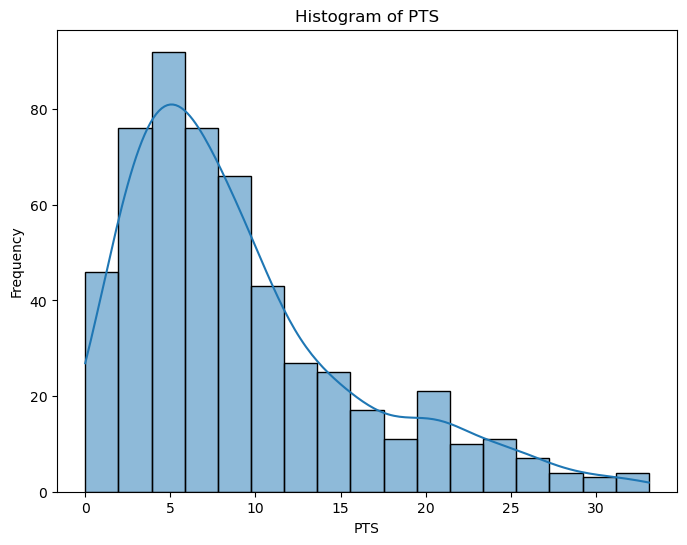

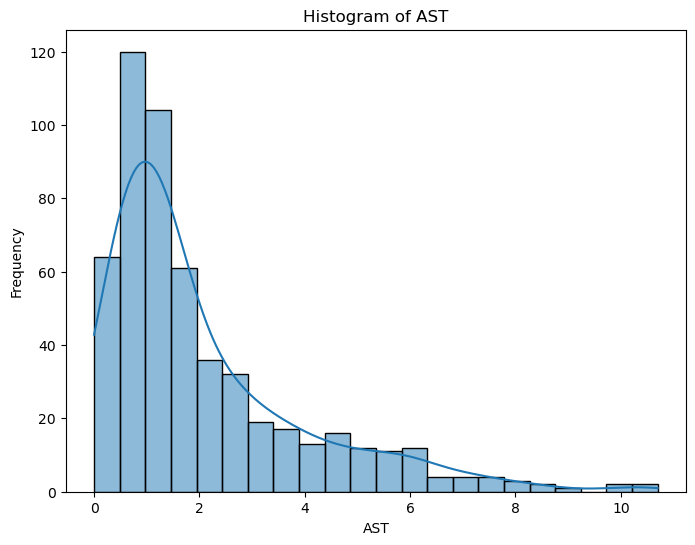

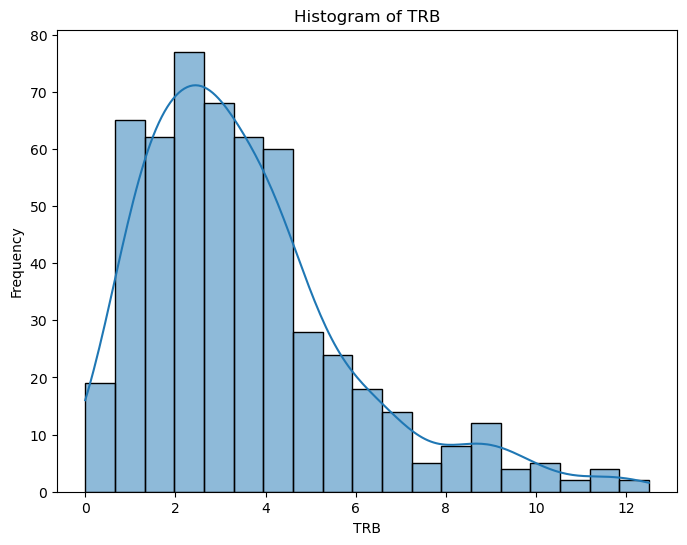

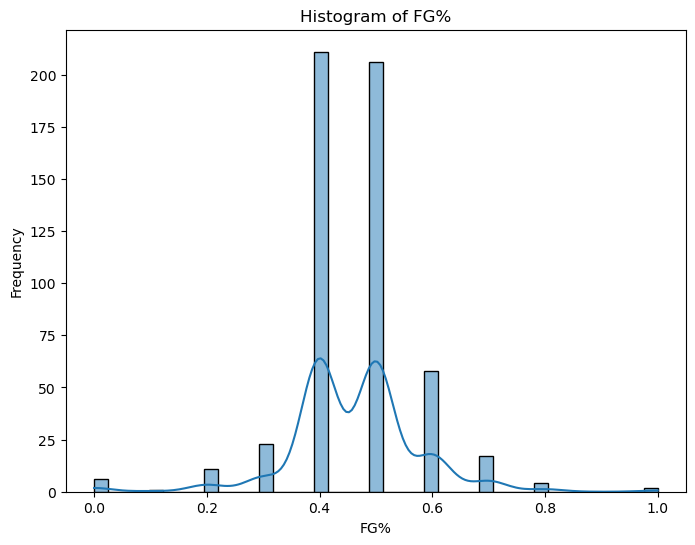

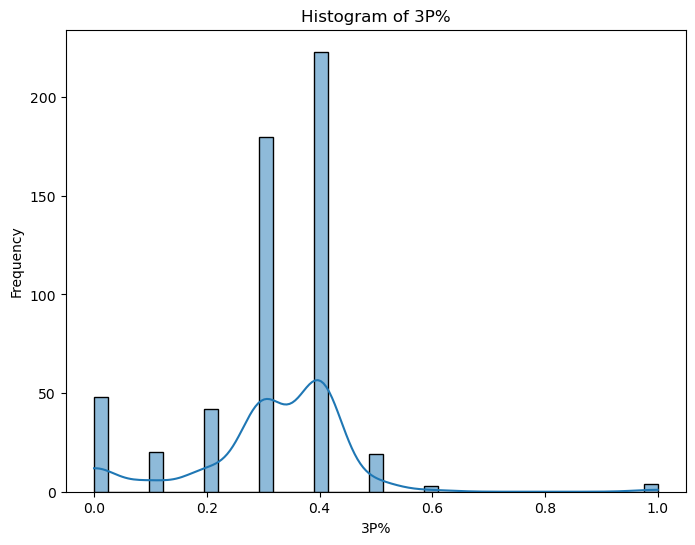

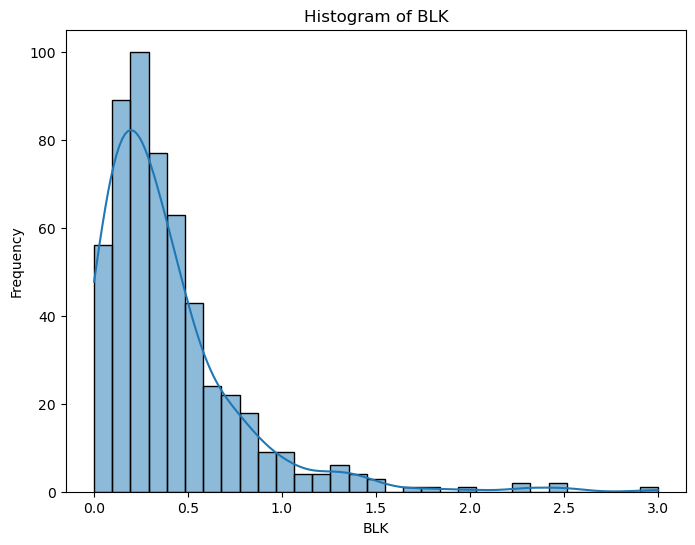

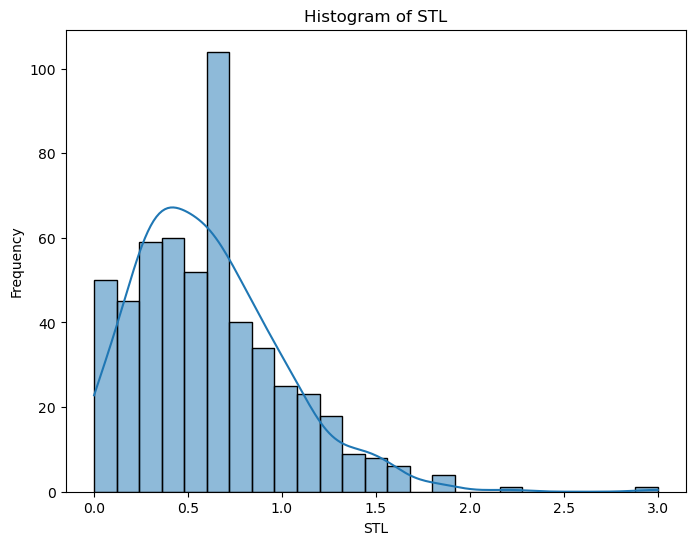

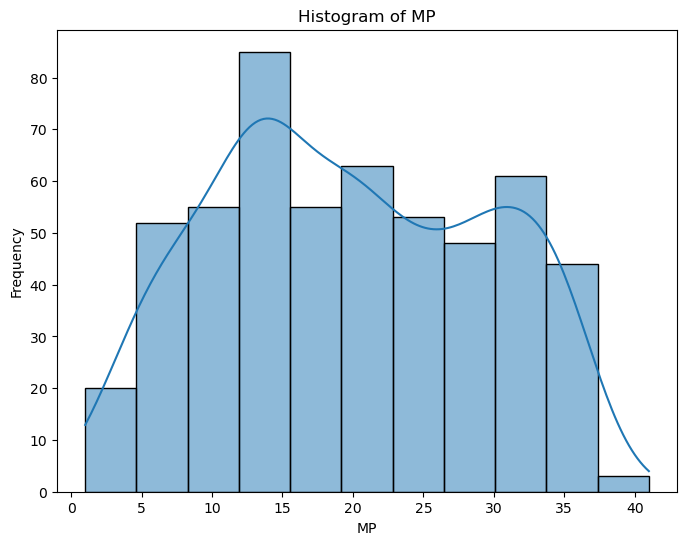

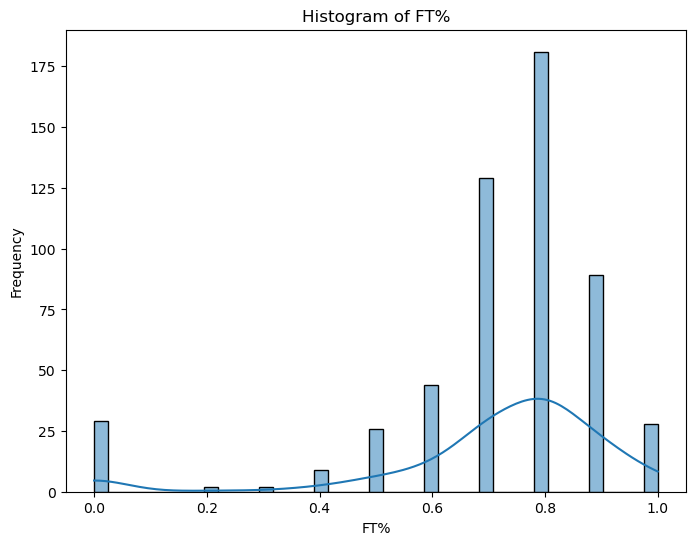

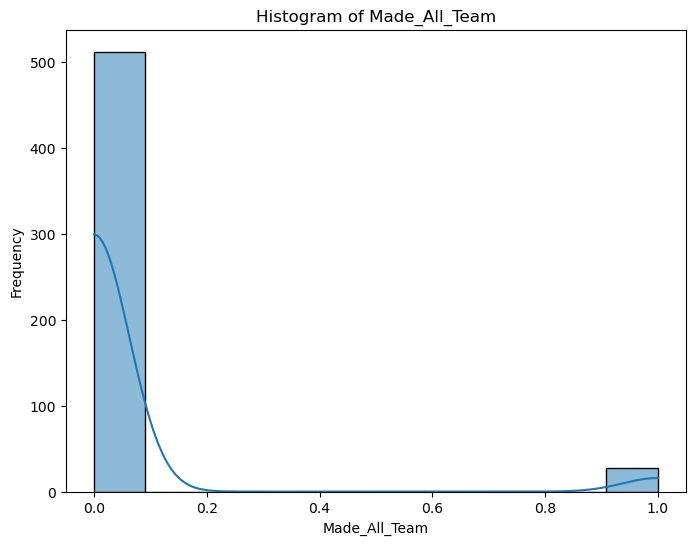

In [11]:
for column in df.columns:
    if df[column].dtype != 'object': 
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Boxplots

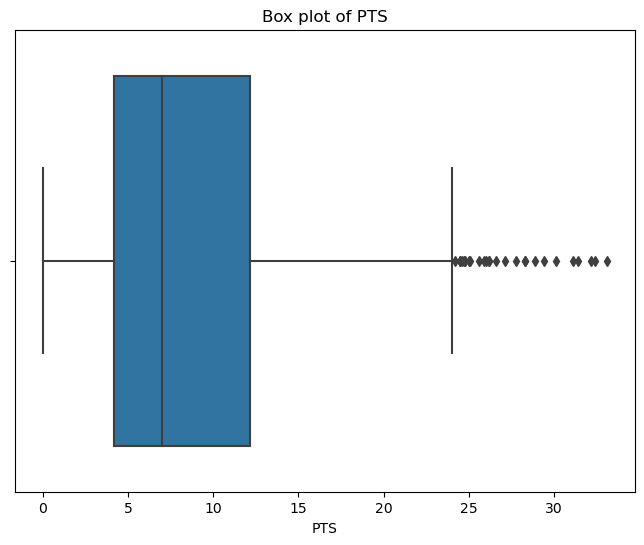

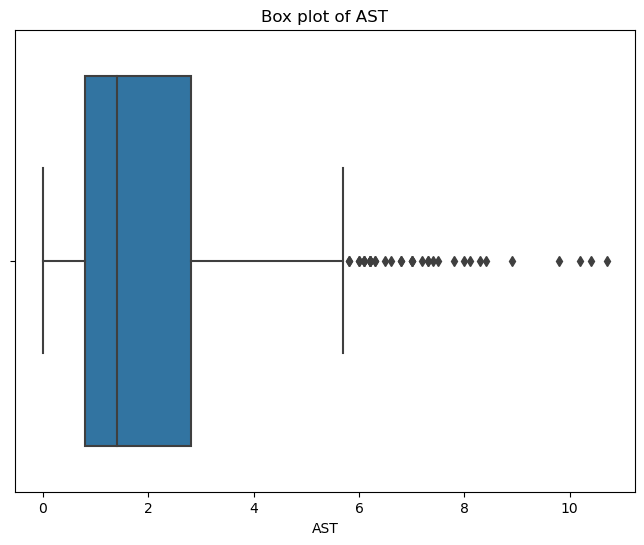

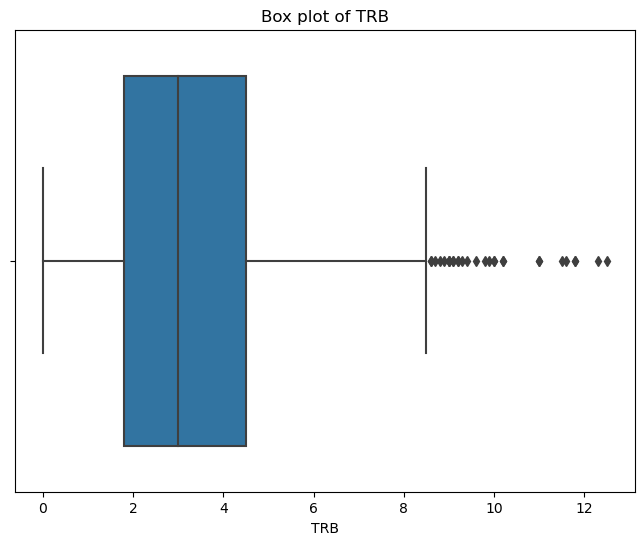

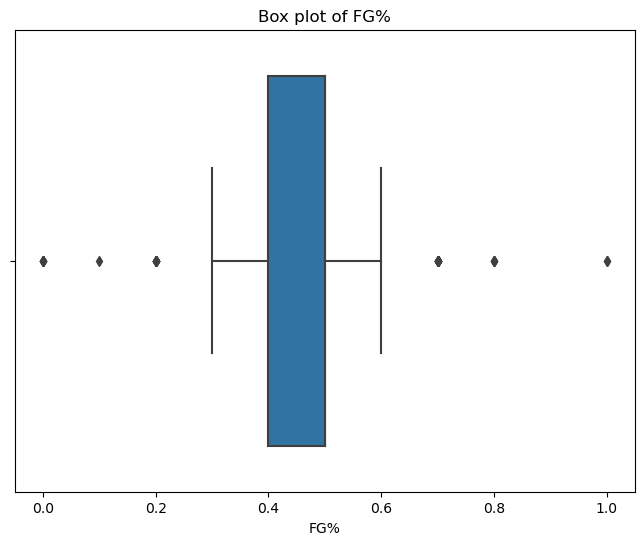

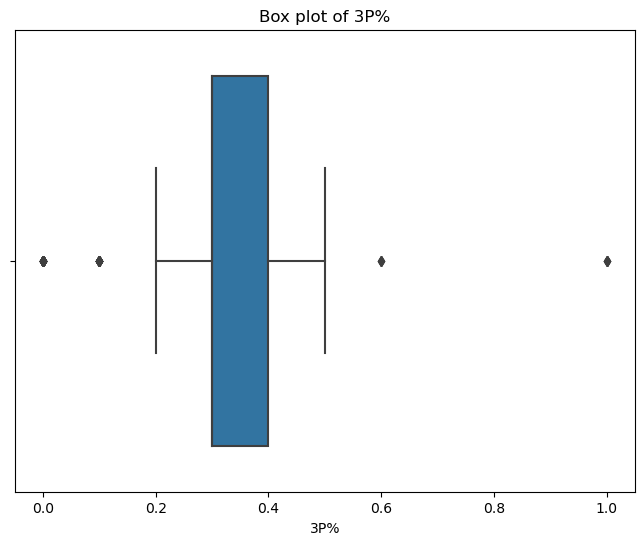

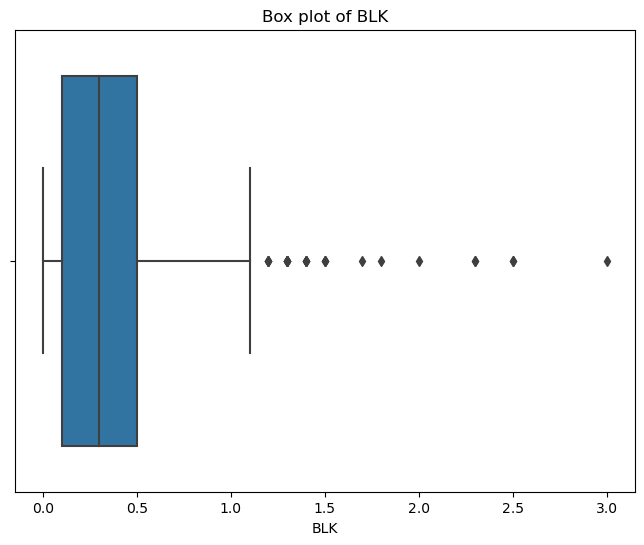

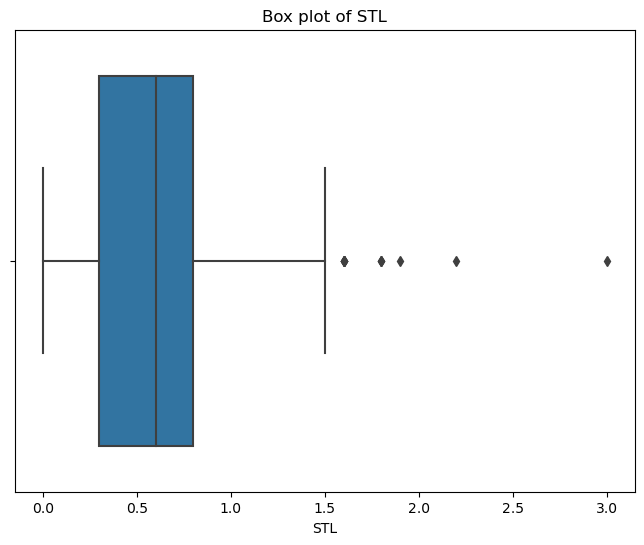

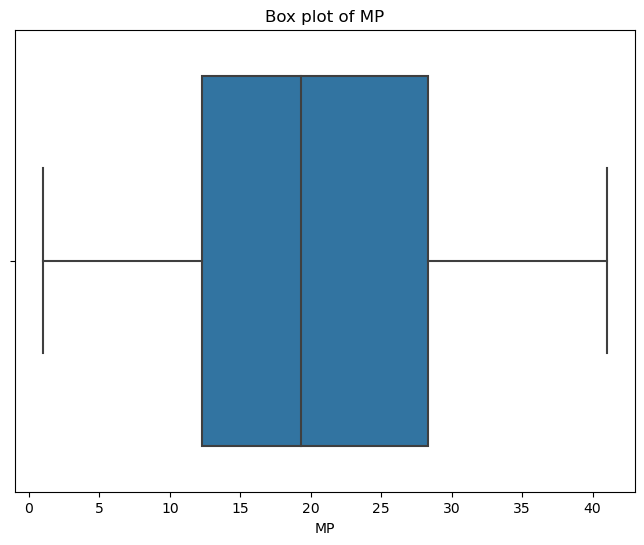

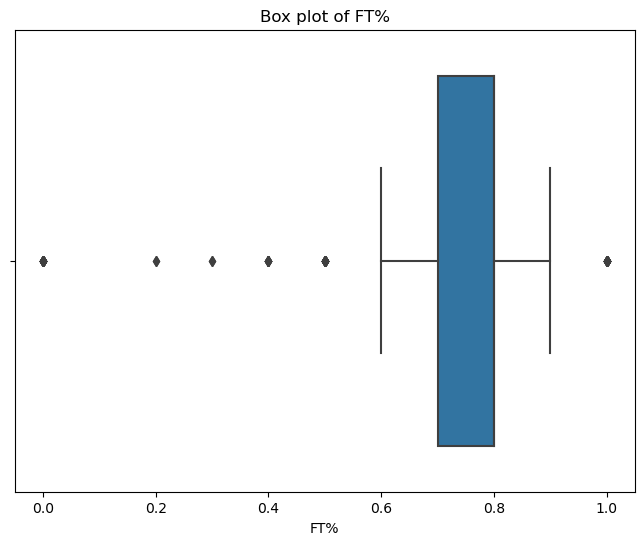

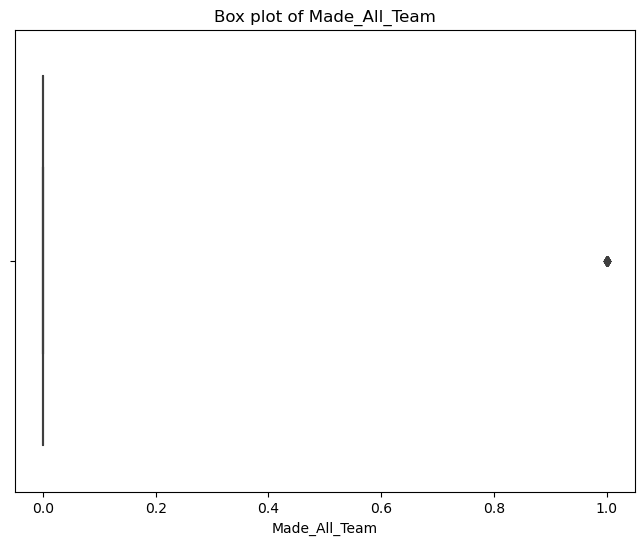

In [12]:
for column in df.columns:
    if df[column].dtype != 'object': 
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.xlabel(column)
        plt.show()

### Potential Reasons for Outliers
##### High Scoring Player:

An NBA player who consistently scores significantly higher points per game (PTS) than the rest of the players in the dataset may be considered an outlier. This player's exceptional scoring ability could be a key factor in All-NBA Team selection.

##### Exceptional Assists or Rebounds:

A player who records an unusually high number of assists per game (AST) or rebounds per game (TRB) compared to other players may be identified as an outlier. This player's exceptional playmaking or rebounding skills could contribute to their selection to the All-NBA Team.
##### Uncommon Shooting Efficiency:

An NBA player who maintains an exceptionally high field goal percentage (FG%) or free throw percentage (FT%) compared to other players may be considered an outlier. This player's exceptional shooting efficiency could be a distinguishing factor in All-NBA Team selection.
##### Extraordinary Defensive Stats:

A player who records an unusually high number of blocks per game (BLK) or steals per game (STL) compared to other players may be classified as an outlier. This player's exceptional defensive abilities could be highly valued in All-NBA Team selection.

## Correlation Matrix

/var/folders/90/5dzpzv914s7cw6fyj42z9xpc0000gn/T/ipykernel_20496/3033790753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


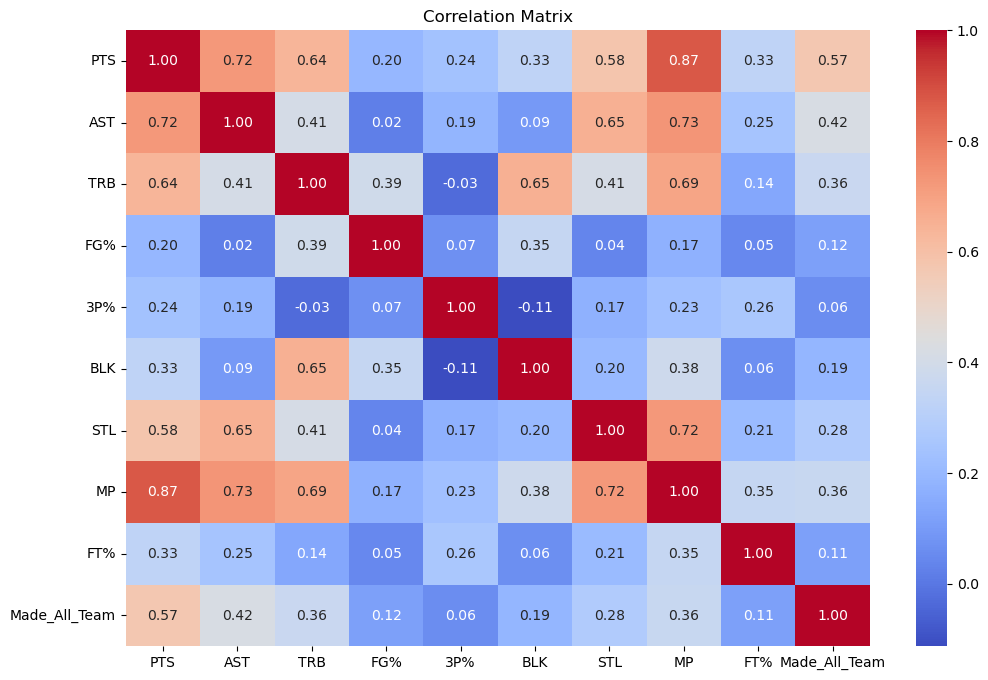

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Strong Correlations
Minutes Played: Points per game (0.87)

#### Moderately Strong Correlations
Minutes Played: Assist per game (0.73)

Minutes Played: Steals per game(0.72)

Minutes Played: Total rebounds per game (0.68)

Total rebounds per game: Blocks per game (0.64)

Made All Team: Points per game (0.58)

Points per game: Steals per game (0.57)

Assists per game: Steals per game (0.57)

### Hypothesis Testing 
We want to see if there are significant differences in various performance metrics between NBA Players who made the All-NBA Team and those who did not.We will focus on the features I selected above and will run a two-sample t-test for each of the features to compare the means of the featre between the two groups (players who made All-NBA Team vs. those who did not).

In [14]:
from scipy.stats import ttest_ind

features = ['PTS', 'AST', 'TRB', 'FG%', '3P%', 'BLK', 'STL', 'MP', 'FT%']


for feature in features:
    # Extract data for players who made All-NBA Team and those who didn't
    all_nba_data = df[df['Made_All_Team'] == 1][feature]
    not_all_nba_data = df[df['Made_All_Team'] == 0][feature]

    # Perform two-sample t-test
    t_statistic, p_value = ttest_ind(all_nba_data, not_all_nba_data)

    # Interpret the results
    alpha = 0.05
    print(f"Feature: {feature}")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    if p_value < alpha:
        print(f"Reject the null hypothesis. There is a significant difference in the average {feature} between players who made the All-NBA Team and those who did not.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant difference in the average {feature} between players who made the All-NBA Team and those who did not.")
    print()

Feature: PTS
T-statistic: 16.197548969563908
P-value: 2.4474309869294117e-48
Reject the null hypothesis. There is a significant difference in the average PTS between players who made the All-NBA Team and those who did not.

Feature: AST
T-statistic: 10.675158923167169
P-value: 2.9537716862909175e-24
Reject the null hypothesis. There is a significant difference in the average AST between players who made the All-NBA Team and those who did not.

Feature: TRB
T-statistic: 9.00174059598866
P-value: 3.8416887881658046e-18
Reject the null hypothesis. There is a significant difference in the average TRB between players who made the All-NBA Team and those who did not.

Feature: FG%
T-statistic: 2.705815322388359
P-value: 0.007030283674660195
Reject the null hypothesis. There is a significant difference in the average FG% between players who made the All-NBA Team and those who did not.

Feature: 3P%
T-statistic: 1.318344947445071
P-value: 0.18795022385881205
Fail to reject the null hypothesis. 

## Key Findings
##### Significant Differences
- We found significant differences in several performance metrics between players who made the All-NBA Team and those who did not. Specifically,  points per game (PTS), assists per game (AST), total rebounds per game (TRB), blocks per game (BLK), steals per game (STL), minutes played per game (MP), and free throw percentage (FT%) showed statistically significant disparities between the two groups.

##### Non-Significant Differences
- Notably, field goal percentage (FG%) and 3-point field goal percentage (3P%) did not exhibit significant differences between players who made the All-NBA Team and those who did not.

## 3. Pre-processing and Training Data Development

In [15]:
X= df.drop(columns=['Player', 'Made_All_Team'])
y= df['Made_All_Team']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [16]:
#Checking shape of subsets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (431, 9)
Testing features shape: (108, 9)
Training target shape: (431,)
Testing target shape: (108,)


## 4. Modeling the Data

### Logistic Regression

- Logistic regression is a simple yet effective model for binary classification tasks like predicting whether a player will make the NBA All-Star Team or not.
- It's interpretable and easy to implement, making it a good starting point for your analysis.

In [17]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred_lg = log_reg.predict(X_test)

accuracy_lg = accuracy_score(y_test, y_pred_lg)
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Classification Report:\n", classification_report(y_test, y_pred_lg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lg))

Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       104
         1.0       0.50      0.25      0.33         4

    accuracy                           0.96       108
   macro avg       0.74      0.62      0.66       108
weighted avg       0.95      0.96      0.96       108

Confusion Matrix:
 [[103   1]
 [  3   1]]
ROC AUC Score: 0.6201923076923077


### Results
1. Accuracy: 
 - The accuracy of the model is 0.962, which means it correctly predicts the All-NBA Team selection for approximately 96.2% of the players in the test set. 

2. Classification Report: 
- Precision:
    - Precision for class 0 (players not selected for All-NBA Team) is high at 0.97, indicating that when the model predicts a player is not selected, it is correct 97% of the time.
    - Precision for class 1 (players selected for All-NBA Team) is lower at 0.50, indicating that when the model predicts a player is selected, it is correct only 50% of the time.
    
- Recall:
    - Recall for class 0 is high at 0.99, indicating that the model correctly identifies 98% of the players who are not selected for All-NBA Team.
    - Recall for class 1 is lower at 0.25, indicating that the model misses 25% of the players who are selected for All-NBA Team.
- F1-score:
    - F1-score for class 0 is high at 0.98, while for class 1 it is lower at 0.33.
    
3. Confusion Matrix:
- The confusion matrix shows the actual versus predicted classes.
- For class 0, there are 103 true negatives (TN) and 1 false negatives (FN).
- For class 1, there are 3 false positives (FP) and 1 true positives (TP).

4. ROC AUC Score
- The ROC AUC score is 0.620, suggesting a decent ability of the model to discriminate between players selected and not selected for All-NBA Team.

In [19]:
actual_labels = df['Made_All_Team'].tolist() 
player_names = df['Player'].tolist()

def print_results(model_name, predictions, actual_labels, player_names):
    print(f"Incorrect predictions for {model_name}:")
    incorrect_predictions = 0
    for player, prediction, actual_label in zip(player_names, predictions, actual_labels):
        if prediction != actual_label:
            result = "Selected" if prediction == 1 else "Not Selected"
            actual_result = "Selected" if actual_label == 1 else "Not Selected"
            print(f"Player: {player}, Prediction: {result}, Actual: {actual_result}")
            incorrect_predictions += 1
    print(f"Total incorrect predictions for {model_name}: {incorrect_predictions}/{len(predictions)}")

In [20]:
# Results of Incorrect Labels
print_results("Logistic Regression", y_pred_lg, actual_labels, player_names)

Incorrect predictions for Logistic Regression:
Player: Anthony Edwards, Prediction: Not Selected, Actual: Selected
Player: Bam Adebayo, Prediction: Not Selected, Actual: Selected
Player: Cole Anthony, Prediction: Selected, Actual: Not Selected
Player: Daishen Nix, Prediction: Selected, Actual: Not Selected
Player: Damian Lillard, Prediction: Not Selected, Actual: Selected
Player: De'Aaron Fox, Prediction: Not Selected, Actual: Selected
Total incorrect predictions for Logistic Regression: 6/108


Overall, the logistic regression model performs well in terms of accuracy, precision, recall, and ROC AUC score. It correctly predicts the majority of instances for both classes, but it has some limitations in correctly predicting the minority class (players selected for All-NBA Team), as indicated by the lower precision and recall for class 1.

## Random Forest

- Random Forest is an ensemble learning method that works well with structured data like player statistics.
- It can handle non-linear relationships between features and the target variable and is robust to overfitting.

In [21]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Accuracy: 0.9814814814814815
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       104
         1.0       0.75      0.75      0.75         4

    accuracy                           0.98       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.98      0.98      0.98       108

Confusion Matrix:
 [[103   1]
 [  1   3]]
ROC AUC Score: 0.8701923076923078


### Results
1. Accuracy:
- The accuracy of the model is 0.981, which means it correctly predicts the All-NBA Team selection for approximately 98.1% of the players in the test set.
2. Classification Report:
- Precision:
    - Precision for class 0 (players not selected for All-NBA Team) is high at 0.99, indicating that when the model predicts a player is not selected, it is correct 99% of the time.
    - Precision for class 1 (players selected for All-NBA Team) is lower at 0.75, indicating that when the model predicts a player is selected, it is correct only 75% of the time.
- Recall:
    - Recall for class 0 is high at 0.99, indicating that the model correctly identifies 99% of the players who are not selected for All-NBA Team.
    - Recall for class 1 is lower at 0.75, indicating that the model misses 25% of the players who are selected for All-NBA Team.
- F1-Score:
    - F1-score for class 0 is high at 0.99, while for class 1 it is lower at 0.75.
3. Confusion Matrix:
    - For class 0, there are 103 true negatives (TN) and 1 false negative (FN).
    - For class 1, there is 1 false positive (FP) and 3 true positives (TP).
4. ROC AUC Score
    - The ROC AUC score is 0.870, suggesting a good ability of the model to discriminate between players selected and not selected for All-NBA Team

In [23]:
#Results of Incorrect Labels
print_results("Random Forest", y_pred_rf, actual_labels, player_names)

Incorrect predictions for Random Forest:
Player: Anthony Edwards, Prediction: Not Selected, Actual: Selected
Player: Bam Adebayo, Prediction: Not Selected, Actual: Selected
Player: Brook Lopez, Prediction: Selected, Actual: Not Selected
Player: Cole Anthony, Prediction: Selected, Actual: Not Selected
Player: Daishen Nix, Prediction: Selected, Actual: Not Selected
Player: Damian Lillard, Prediction: Not Selected, Actual: Selected
Player: De'Aaron Fox, Prediction: Not Selected, Actual: Selected
Player: De'Andre Hunter, Prediction: Selected, Actual: Not Selected
Total incorrect predictions for Random Forest: 8/108


Overall, the Random Forest model performs well in terms of overall accuracy and ROC AUC score. However, it has some limitations in correctly predicting the minority class (players selected for All-NBA Team), as indicated by lower precision, recall, and F1-score for class 1. 

## Gradient Boosting Machine (GBM)

- Gradient Boosting Machines are powerful ensemble learning techniques that can capture complex relationships in the data.
- They perform well on structured data and can handle missing values and outliers effectively.

In [24]:
gbm = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)


accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Classification Report:\n", classification_report(y_test, y_pred_gbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gbm))

Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       104
         1.0       0.60      0.75      0.67         4

    accuracy                           0.97       108
   macro avg       0.80      0.87      0.83       108
weighted avg       0.98      0.97      0.97       108

Confusion Matrix:
 [[102   2]
 [  1   3]]
ROC AUC Score: 0.8653846153846153


### Results
1. Accuracy
-  The accuracy is approximately 97.2%, which means it correctly predicts the All-NBA Team selection for approximately 97.2% of the players in the test set.

2. Classification Report:
- ecision:
    - Precision for class 0 (players not selected for All-NBA Team) is high at 0.99, indicating that when the model predicts a player is not selected, it is correct 99% of the time.
    - Precision for class 1 (players selected for All-NBA Team) is lower at 0.60, indicating that when the model predicts a player is selected, it is correct only 75% of the time.
- Recall:
    - Recall for class 0 is high at 0.98, indicating that the model correctly identifies 98% of the players who are not selected for All-NBA Team.
    - Recall for class 1 is lower at 0.75, indicating that the model misses 25% of the players who are selected for All-NBA Team.
- F1-Score:
    - F1-score for class 0 is high at 0.99, while for class 1 it is lower at 0.67.
3. Confusion Matrix:
    - For class 0, there are 102 true negatives (TN) and 2 false negative (FN).
    - For class 1, there is 1 false positive (FP) and 3 true positives (TP).
4. ROC AUC Score
    - The ROC AUC score is 0.865, suggesting a good ability of the model to discriminate between players selected and not selected for All-NBA Team.


In [25]:
#Results of Incorrect Labels
print_results("Gradient Boosting Machine (GBM)", y_pred_gbm, actual_labels, player_names)

Incorrect predictions for Gradient Boosting Machine (GBM):
Player: Anthony Edwards, Prediction: Not Selected, Actual: Selected
Player: Bam Adebayo, Prediction: Not Selected, Actual: Selected
Player: Brook Lopez, Prediction: Selected, Actual: Not Selected
Player: Cole Anthony, Prediction: Selected, Actual: Not Selected
Player: Daishen Nix, Prediction: Selected, Actual: Not Selected
Player: Damian Lillard, Prediction: Not Selected, Actual: Selected
Player: Darius Garland, Prediction: Selected, Actual: Not Selected
Player: De'Aaron Fox, Prediction: Not Selected, Actual: Selected
Player: De'Andre Hunter, Prediction: Selected, Actual: Not Selected
Total incorrect predictions for Gradient Boosting Machine (GBM): 9/108


Overall, the Gradient Boosting Machine (GBM) model demonstrates strong performance, achieving high accuracy and a respectable ROC AUC score. However, it exhibits challenges in accurately identifying the minority class (players selected for the All-NBA Team). This is evident from the lower precision, recall, and F1-score for class 1, which indicates that the model struggles to correctly predict instances belonging to this class.

## Comparison of the Models

#### Precision Recall Curve

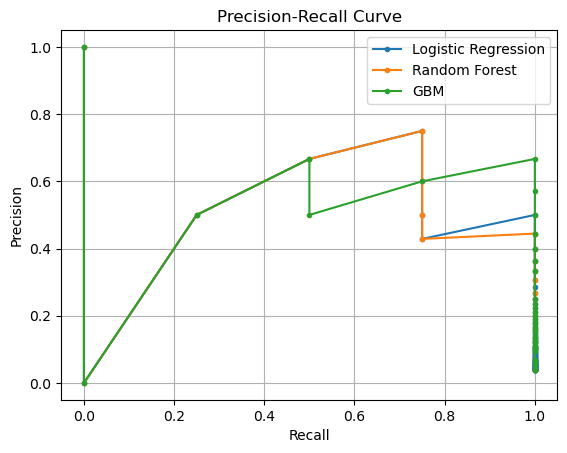

In [26]:
#Logistic Regression
y_scores_lg = log_reg.predict_proba(X_test)[:, 1]
precision_lg, recall_lg, _ = precision_recall_curve(y_test, y_scores_lg)
plt.plot(recall_lg, precision_lg, marker='.', label='Logistic Regression')
#Random Forest
y_scores_rf = rf_classifier.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
#Gradient Boosting Machine
y_scores_gbm = gbm.predict_proba(X_test)[:, 1]
precision_gbm, recall_gbm, _ = precision_recall_curve(y_test, y_scores_gbm)
plt.plot(recall_gbm, precision_gbm, marker='.', label='GBM')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()

plt.show()

#### Comparing Accuracy

In [27]:
labels = ['Logisitic Regression', 'Random Forest', 'Gradient Boosting Machine (GBM)']
accuracy = [accuracy_lg, accuracy_rf, accuracy_gbm ]

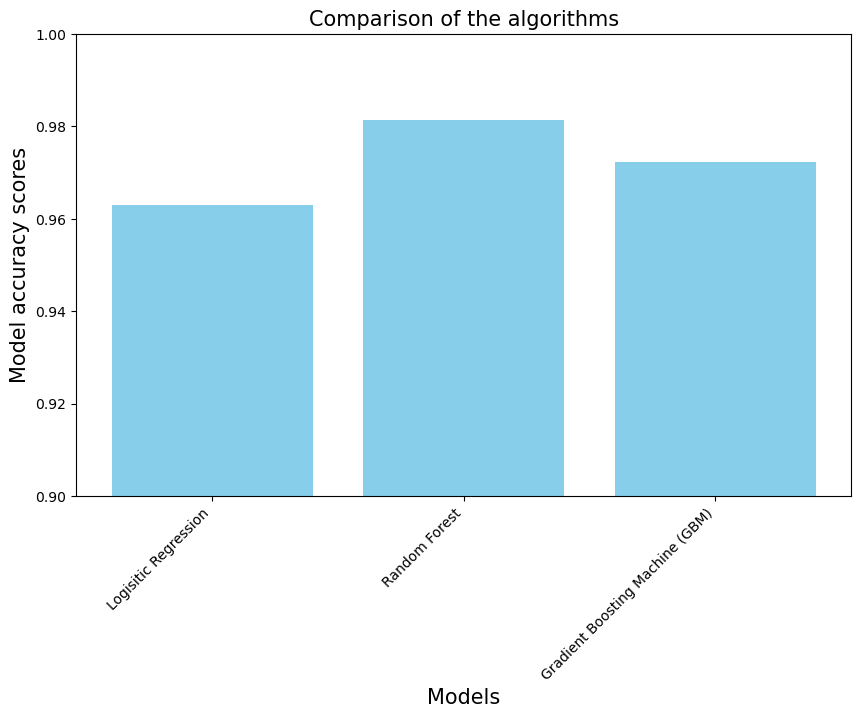

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy, color='skyblue')

plt.xlabel('Models',fontsize=15)
plt.ylabel('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)

plt.xticks(rotation=45, ha='right')  
plt.ylim(0.9, 1.0)

plt.show()

#### Comparing Correct Labels

In [29]:
actual_labels = df['Made_All_Team'].tolist()

correct_predictions_lg = sum(1 for pred, actual in zip(y_pred_lg, actual_labels) if pred == actual)
incorrect_predictions_lg = len(y_pred_lg) - correct_predictions_lg

correct_predictions_rf = sum(1 for pred, actual in zip(y_pred_rf, actual_labels) if pred == actual)
incorrect_predictions_rf = len(y_pred_rf) - correct_predictions_rf

correct_predictions_gbm = sum(1 for pred, actual in zip(y_pred_gbm, actual_labels) if pred == actual)
incorrect_predictions_gbm = len(y_pred_gbm) - correct_predictions_gbm


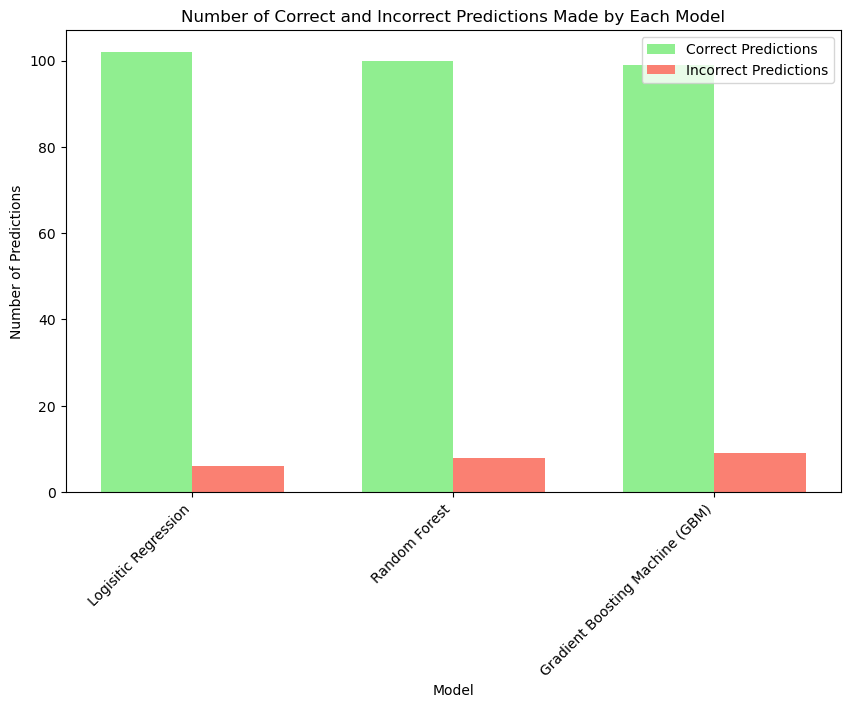

In [30]:
correct_predictions = [correct_predictions_lg, correct_predictions_rf, correct_predictions_gbm]

incorrect_predictions = [incorrect_predictions_lg, incorrect_predictions_rf, incorrect_predictions_gbm]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(labels))

plt.bar(index, correct_predictions, bar_width, label='Correct Predictions', color='lightgreen')
plt.bar([i + bar_width for i in index], incorrect_predictions, bar_width, label='Incorrect Predictions', color='salmon')

plt.xlabel('Model')
plt.ylabel('Number of Predictions')
plt.title('Number of Correct and Incorrect Predictions Made by Each Model')
plt.xticks([i + bar_width / 2 for i in index], labels, rotation=45, ha='right')
plt.legend()

plt.show()

### Conclusion of Models

Based on all the models above, it appears that the Random Forest model has the highest accuracy (0.981), precision (0.75 for class 1), recall (0.75 for class 1), F1-score (0.75 for class 1), and ROC AUC score (0.87).

Therefore, the Random Forest model would be the most suitable choice for building a predictive model for All-NBA team selections based on the given results.

- High Accuracy: The Random Forest model achieves the highest accuracy among the three models, indicating that it correctly predicts the All-NBA team selections for a large proportion of instances.

- Balanced Precision and Recall: The precision and recall for class 1 (players selected for the All-NBA team) are both reasonably high (0.75), suggesting that the model can effectively identify true positives (players selected for the All-NBA team) while minimizing false positives.

- Robustness: Random Forest models are known for their robustness to overfitting and ability to handle a large number of features. They are also less sensitive to outliers and noisy data compared to some other models.

- Interpretability: While Random Forest models are not as interpretable as some simpler models like Logistic Regression, they still provide insights into feature importance, which can help identify the key performance metrics and factors influencing voters' decisions for All-NBA team selections.

## 5. Conclusion

-**Model Performance:** We tested different models to predict which basketball players would make the All-NBA Teams. The Random Forest model performed the best overall, accurately identifying players chosen for the All-NBA Teams with the highest accuracy.

-**Key Factors:** The models showed that certain player statistics, like points per game and field goal percentage, are important in predicting All-NBA Team selections. These factors give us a better idea of what voters consider when choosing the best players.

-**Practical Use:** Our models can help teams and analysts identify players who are likely to make the All-NBA Teams. This information can be valuable for teams when making decisions about player recruitment and team strategy.

-**Next Steps:** While our models provide helpful insights, there are still limitations to consider, like the need for more data and the ever-changing nature of player performance. Future research could explore other factors that influence All-NBA Team selections to improve our predictions further.

-**Overall Implications:** Our project offers a data-driven approach to understanding and predicting All-NBA Team selections. By using these models alongside expert knowledge, teams can make more informed decisions in the basketball world.

In conclusion, the modeling efforts offer a data-driven approach to understanding and predicting All-NBA Team selections, contributing to the ongoing discussions and advancements in basketball analytics and player evaluation.